# تحلیل جامع متخصصان ICT ایرانی و مهاجرت

<div dir="rtl">
    در این نوت‌بوک، داده‌های مربوط به متخصصان ICT ایرانی از شبکه اجتماعی LinkedIn مورد بررسی قرار می‌گیرند. هدف ما شناسایی الگوهای تحصیلی، تجربیات شغلی و روند مهاجرت این متخصصان است. سوالات کلیدی شامل موارد زیر است:

- محبوب‌ترین رشته‌های تحصیلی در میان متخصصان ICT چیست؟
- روند تغییرات تحصیلی در 15 سال اخیر چگونه است؟
- محبوب‌ترین مشاغل در میان این متخصصان کدام‌اند؟
- در سال‌های اخیر چه مشاغلی به وجود آمده و چه مشاغلی از بین رفته‌اند؟
- کشورهای مقصد اصلی مهاجرت متخصصان ICT کدام‌ها هستند؟
- آیا ارتباطی بین سابقه شغلی و زمان مهاجرت وجود دارد؟
</div>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')

print('کتابخانه‌ها به درستی بارگذاری شدند.')

کتابخانه‌ها به درستی بارگذاری شدند.


## ۱. بارگذاری و پیش‌پردازش داده‌ها

در این بخش، داده‌های مربوط به متخصصان ICT از یک فایل CSV بارگذاری می‌شود. همچنین ستون‌های کاملاً خالی حذف و برخی از مقادیر مانند نام کشور به منظور یکسان‌سازی استانداردسازی می‌شوند.

In [23]:
file_path = 'emigrate_ict.csv'
df = pd.read_csv(file_path)

display(df.head())
df.dropna(axis=1, how='all', inplace=True)

df['location_country'] = df['location_country'].str.strip().str.lower()

,full_name,linkedin_username,location_country,history[0].type,history[1].type,history[2].type,history[3].type,history[4].type,history[5].type,history[6].type,...,history[19].country,history[20].country,history[21].country,history[22].country,history[23].country,history[24].country,history[25].country,history[26].country,history[27].country,exit_type
0,soroush ebadi,soroush-ebadi,Netherlands,education,education,experience,experience,experience,experience,experience,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,education
1,azin piran,azin-p,Canada,education,experience,experience,education,experience,experience,education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,experience
2,amirzad pakzadeh,amirzad-pakzadeh-23217018,Australia,education,education,education,experience,education,experience,experience,...,united states,"Iran, Islamic Republic of",Iran,elsewhere,"Iran, Islamic Republic of",NaN,NaN,NaN,NaN,education
3,abed saeed,abed-saeed-4b802819,United Arab Emirates,education,education,experience,experience,education,education,experience,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,education
4,kamran dehghan,kamran-dehghan,Italy,education,experience,experience,experience,experience,experience,experience,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,experience


## ۲. استخراج اطلاعات حوزه تحصیلی و شغلی

در این بخش، اطلاعات مربوط به سابقه تحصیلی و تجربیات شغلی استخراج می‌شود. به عنوان نمونه، ستون‌هایی مانند `history[0].type` معمولاً اطلاعات مربوط به تحصیلات را در بر دارند و ستون `history[1].type` مربوط به تجربیات شغلی است. همچنین ستون‌های مربوط به تاریخ فارغ‌التحصیلی یا شروع شغل (مثلاً `history[0].end_date` و `history[1].start_date`) در صورت وجود استخراج می‌شوند.

In [24]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].fillna('').astype(str).str.strip().str.lower()

if 'history[0].type' in df.columns:
    edu_series = df['history[0].type']
    edu_counts_series = edu_series.value_counts()
    print('تعداد دفعات ذکر نوع تحصیلات در ستون history[0].type:')
    print(edu_counts_series.head(10))
else:
    print('ستون history[0].type موجود نیست.')

if 'history[1].type' in df.columns:
    job_series = df['history[1].type']
    job_counts = job_series.value_counts()
    print('تعداد دفعات ذکر نوع شغل در ستون history[1].type:')
    print(job_counts.head(10))
else:
    print('ستون history[1].type موجود نیست.')

تعداد دفعات ذکر نوع تحصیلات در ستون history[0].type:
history[0].type
education     777
experience    223
Name: count, dtype: int64
تعداد دفعات ذکر نوع شغل در ستون history[1].type:
history[1].type
experience    541
education     441
               18
Name: count, dtype: int64


## ۳. تحلیل حوزه تحصیلی و مصورسازی

### ۳.۱ محبوب‌ترین رشته‌ها

در این بخش ابتدا تعداد دفعات ذکر نوع تحصیلات (به عنوان نمونه، نوع تحصیلات ذکر شده در ستون `history[0].type`) محاسبه و سپس نمودار میله‌ای برای نمایش محبوبیت رشته‌های تحصیلی رسم می‌شود.

C:\Users\VIRA\AppData\Local\Temp\ipykernel_5612\1772247354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_counts_series.index, y=edu_counts_series.values, palette='viridis',legend=True)


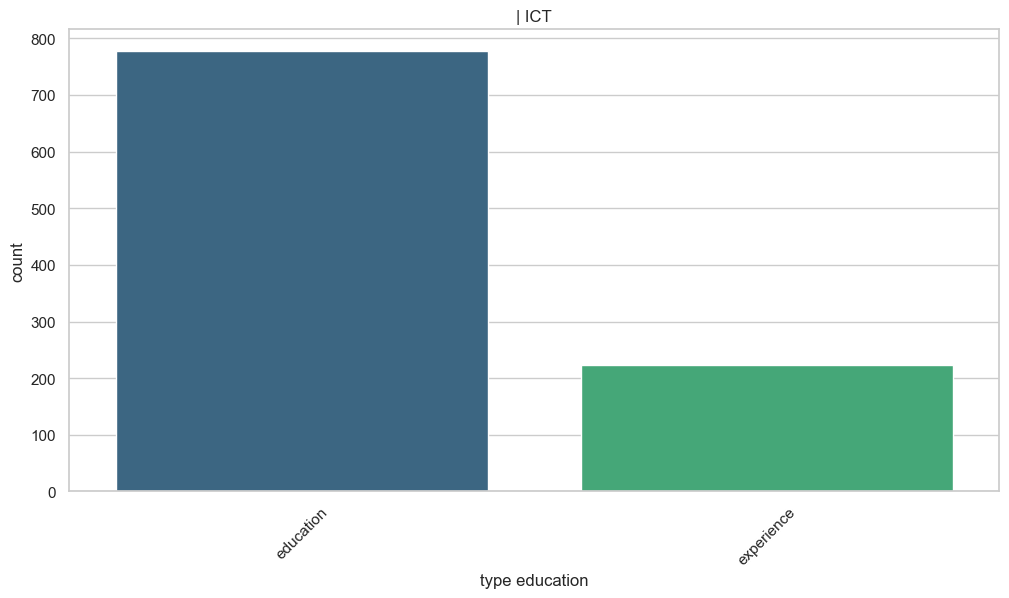

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=edu_counts_series.index, y=edu_counts_series.values, palette='viridis',legend=True)
plt.xlabel('type education')
plt.ylabel('count')
plt.title('| ICT')
plt.xticks(rotation=45)
plt.show()

### ۳.۲ تحلیل سری زمانی تحصیلات

در این بخش سعی می‌کنیم تغییرات تحصیلی در 15 سال اخیر را بررسی کنیم. اگر ستون تاریخ پایان تحصیلات (مثلاً `history[0].end_date`) موجود باشد، سال فارغ‌التحصیلی استخراج شده و بر اساس آن تعداد موارد گروه‌بندی می‌شود.

C:\Users\VIRA\AppData\Local\Temp\ipykernel_5612\3829420628.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['graduation_year'] = pd.to_datetime(df['history[0].end_date'], errors='coerce').dt.year


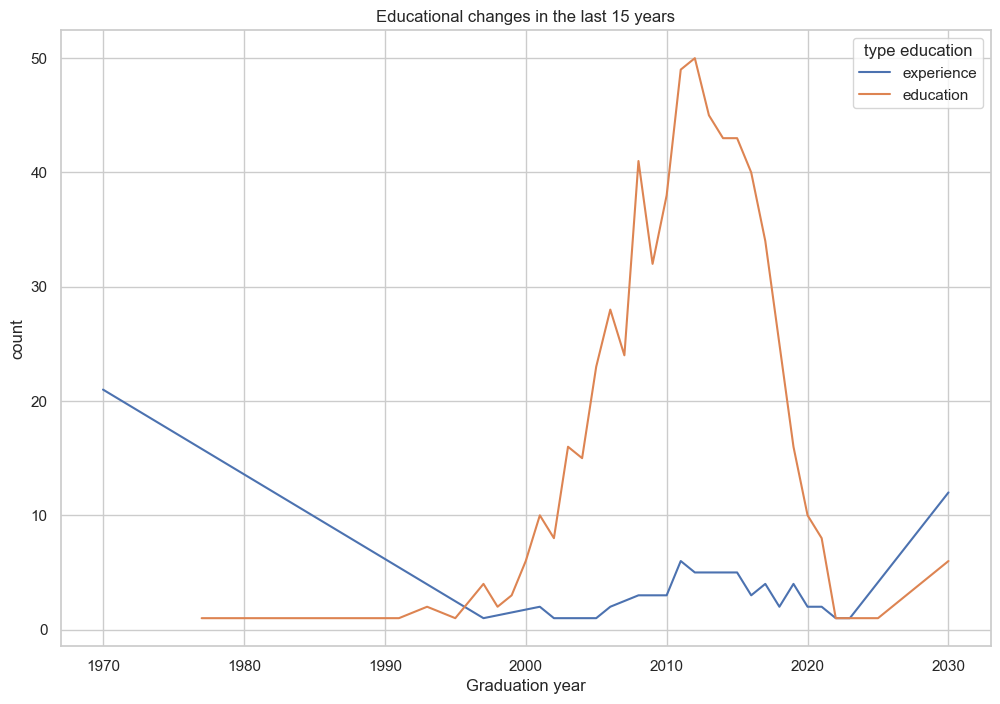

In [28]:
df['graduation_year'] = pd.to_datetime(df['history[0].end_date'], errors='coerce').dt.year
edu_time = df.groupby(['graduation_year', 'history[0].type']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.lineplot(data=edu_time.dropna(), x='graduation_year', y='count', hue='history[0].type')
plt.title('Educational changes in the last 15 years')
plt.xlabel('Graduation year')
plt.ylabel('count')
plt.legend(title='type education')
plt.show()


## ۴. تحلیل حوزه شغلی و مصورسازی

### ۴.۱ محبوب‌ترین مشاغل

در این بخش ابتدا تعداد دفعات ذکر نوع شغل (مثلاً ستون `history[1].type`) محاسبه شده و سپس نمودار میله‌ای برای نمایش محبوب‌ترین مشاغل رسم می‌شود.

C:\Users\VIRA\AppData\Local\Temp\ipykernel_5612\3168273049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.index, y=job_counts.values, palette='magma')


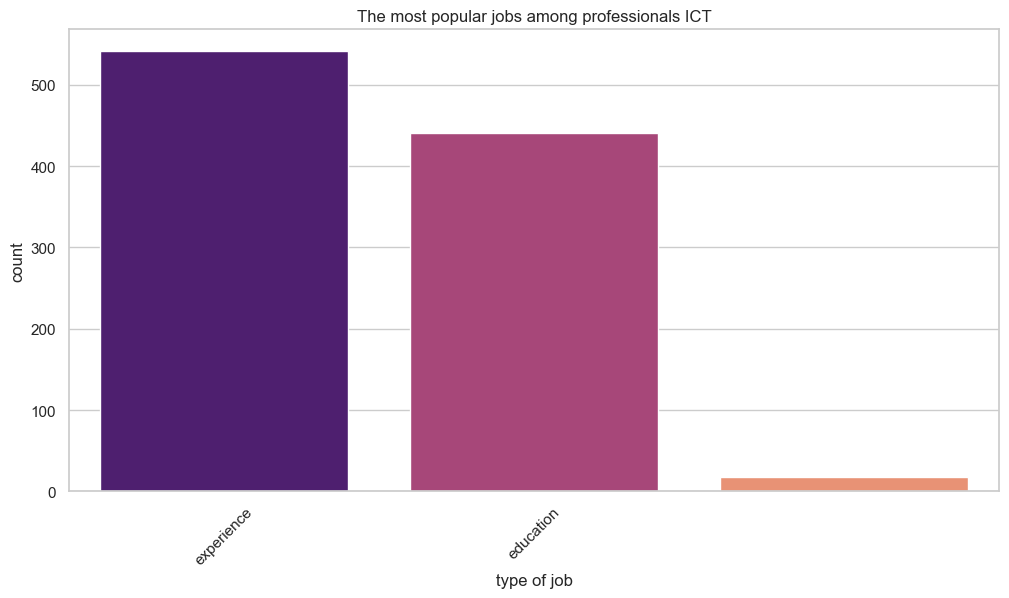

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='magma')
plt.xlabel('type of job')
plt.ylabel('count')
plt.title('The most popular jobs among professionals ICT')
plt.xticks(rotation=45)
plt.show()

### ۴.۲ تحلیل سری زمانی مشاغل

در صورتی که ستون تاریخ شروع شغل (مثلاً `history[1].start_date`) موجود باشد، با استخراج سال شروع شغل می‌توان روند تغییرات مشاغل در طول زمان را مورد بررسی قرار داد.

C:\Users\VIRA\AppData\Local\Temp\ipykernel_5612\357941811.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['job_start_year'] = pd.to_datetime(df['history[1].start_date'], errors='coerce').dt.year


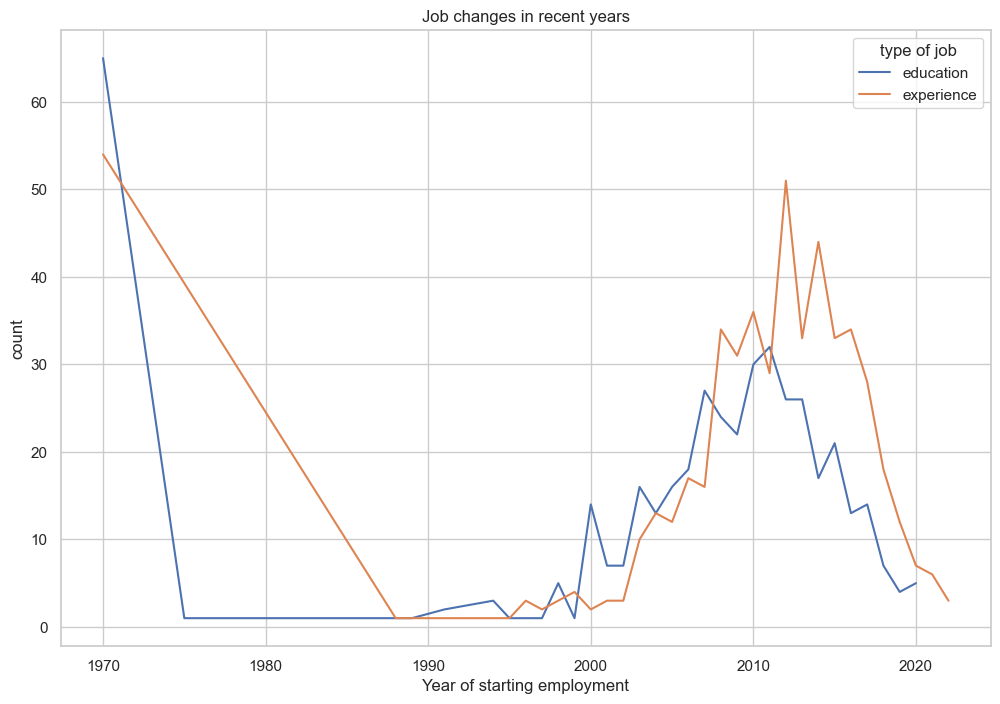

In [30]:
df['job_start_year'] = pd.to_datetime(df['history[1].start_date'], errors='coerce').dt.year
job_time = df.groupby(['job_start_year', 'history[1].type']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.lineplot(data=job_time.dropna(), x='job_start_year', y='count', hue='history[1].type')
plt.title('Job changes in recent years')
plt.xlabel('Year of starting employment')
plt.ylabel('count')
plt.legend(title='type of job')
plt.show()

## ۵. تحلیل حوزه مهاجرت و مصورسازی

### ۵.۱ تحلیل مقصدهای مهاجرت

در این بخش از ستون استاندارد شده کشور محل سکونت (`location_country`) جهت شناسایی کشورهای مقصد اصلی مهاجرت استفاده می‌شود. نمودار میله‌ای تعداد متخصصانی که به هر کشور مهاجرت کرده‌اند را نشان می‌دهد.

C:\Users\VIRA\AppData\Local\Temp\ipykernel_5612\783262774.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=destination_counts.values, y=destination_counts.index, palette='coolwarm')


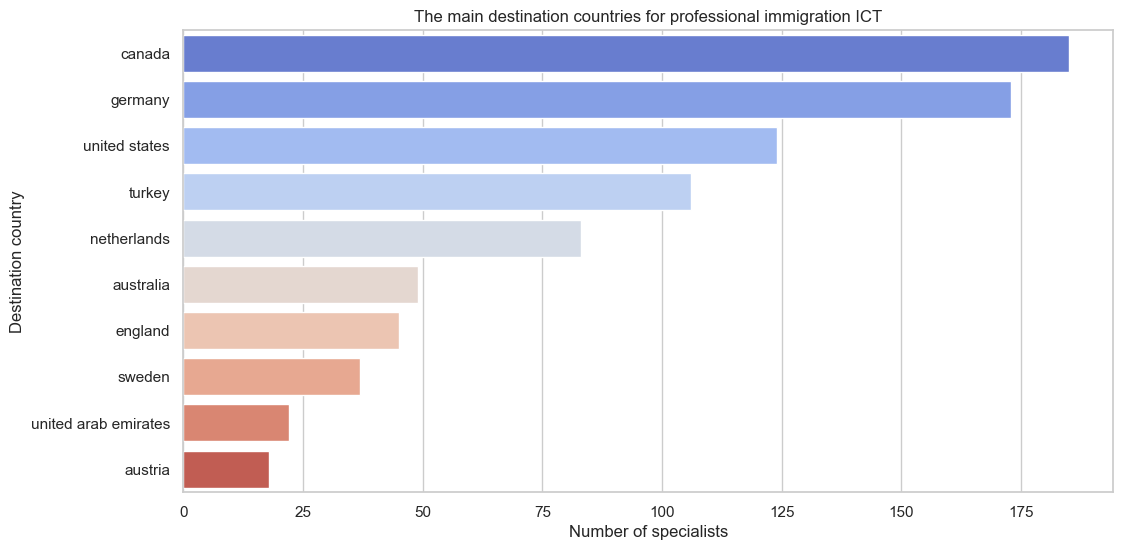

In [31]:
destination_counts = df['location_country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=destination_counts.values, y=destination_counts.index, palette='coolwarm')
plt.xlabel('Number of specialists')
plt.ylabel('Destination country')
plt.title('The main destination countries for professional immigration ICT')
plt.show()

### ۵.۲ بررسی ارتباط بین سابقه شغلی و زمان مهاجرت

در این بخش در صورت وجود اطلاعات مربوط به تاریخ شروع شغل (مثلاً `history[1].start_date`) و نوع خروج (مثلاً ستون `exit_type` که نشان‌دهنده نوع خروج، تحصیلی یا شغلی است)، رابطه بین سال شروع شغل و نوع خروج (که می‌تواند به عنوان شاخصی از زمان مهاجرت در نظر گرفته شود) بررسی می‌شود.

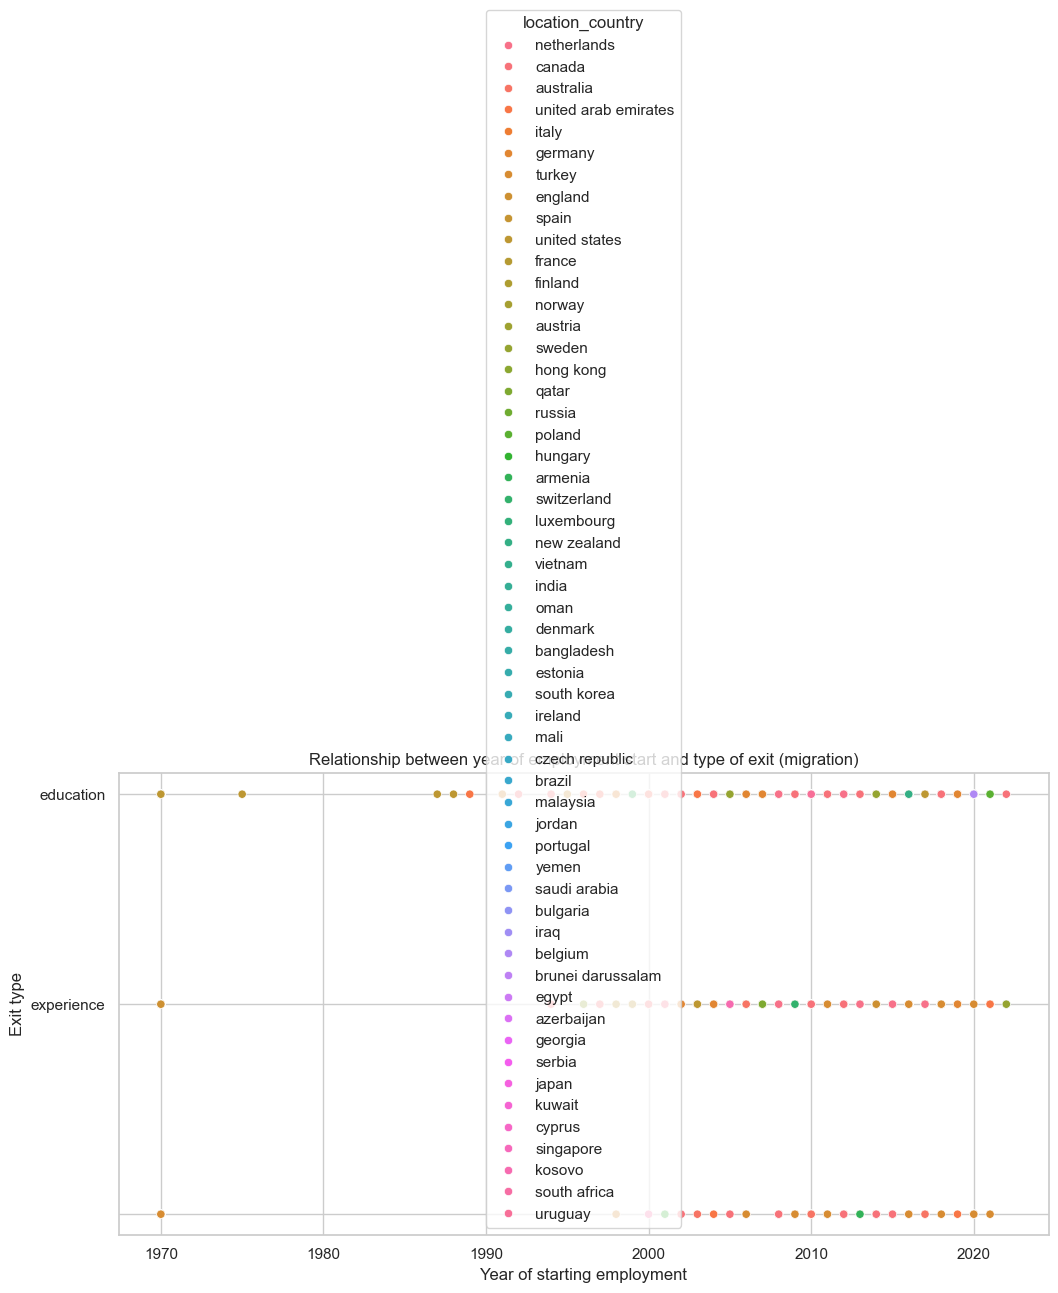

In [32]:
df['job_start_year'] = pd.to_datetime(df['history[1].start_date'], errors='coerce').dt.year

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='job_start_year', y='exit_type', hue='location_country')
plt.title('Relationship between year of employment start and type of exit (migration)')
plt.xlabel('Year of starting employment')
plt.ylabel('Exit type')
plt.show()